In [1]:
import ROOT as r

Welcome to JupyROOT 6.12/06


In [3]:
f = r.TFile("./data/stripped_gm2skim_ana_16356.root")

t = f.Get("allmuons/tree")
#t.Print()

In [4]:
caloEnergyCut = "cluEne > 1100 && cluEne < 2400 "  
qualityCut = "trkPassCaloVertexQuality && trkPassTrackQuality && trkPassVertexQuality"   
stationCut = " trkStationNum == 12 "          
allCuts = caloEnergyCut+" && "+qualityCut+" && "+stationCut       

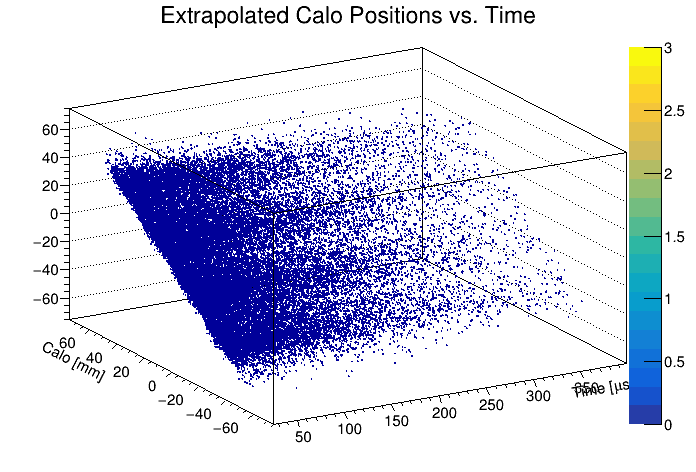

In [5]:
h = r.TH3I("h","Extrapolated Calo Positions vs. Time; Time [#mus]; Calo [mm]", 2500,25,397.975, 251,-75,75, 251,-75,75 )

t.Draw("(cluY-3)*25:vY:cluTime/1000.*1.25>>h",allCuts,"goff")

c = r.TCanvas()
h.Draw("lego2z")
c.Draw()

 FCN=1577.45 FROM MINOS     STATUS=SUCCESSFUL      8 CALLS          70 TOTAL
                     EDM=1.75061e-17    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -5.23732e-01   2.92727e-01  -0.00000e+00   1.20717e-06
   2  p1           5.72025e-03   2.95041e-03   2.95041e-03  -2.69043e-05


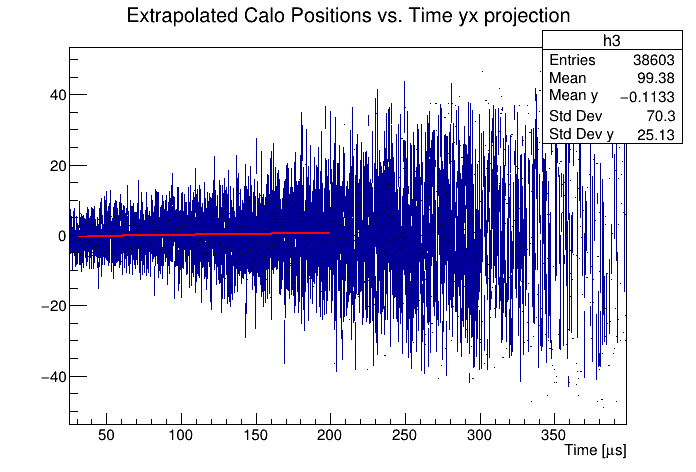

In [6]:
h3 = h.Project3D("yx").ProfileX().Clone("h3")

c = r.TCanvas()
h3.Draw("pl")
func = r.TF1("func","pol1",30,200)
h3.Fit(func, "REMB")
c.Draw()
